Проект 2. Разведывательный анализ данных EDA

Цель проекта: Проведение разведывательного анализа предложенных данных из dataset для его подготовки к обучению и тестированию ML-модели

Задачи проекта:

1. Провести первичную обработку данных (первичный осмотр данных)
2. Посмотреть на распределенные признака для числовых переменных, устранить выбросы
3. Оценить количество уникальных значений для номинативных переменных
4. По необходимости преобразовать данные
5. Провести корреляционный анализ количественных переменных
6. Отобрать не коррелирующие переменные
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину
8. Сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели

Импорт библиотек

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import random
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок\


from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))



#cacao.drop(['bar_id'], inplace = True, axis = 1)
#cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
#cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
#acao.rating = cacao.rating.apply(lambda x: float(x.replace('t', '')))
#cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x if '(' not in x else x[:x.find('(')].strip())
#cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)
#cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else None if x.strip() == '' else x)

#display(cacao)


#display(pd.DataFrame(cacao.specific_origin.value_counts()))
#print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
#     , (cacao.specific_origin.value_counts()>10).sum())
#cacao.loc[:, ['specific_origin']].info()

#cacao.ref.hist()
#cacao.ref.describe()

#cacao.review_date.hist()
#cacao.review_date.describe()

#cacao.cocoa_percent

#cacao.cocoa_percent.hist()
#cacao.cocoa_percent.describe()

#IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
#perc25 = cacao.cocoa_percent.quantile(0.25)
#perc75 = cacao.cocoa_percent.quantile(0.75)
 
#print(
#'25-й перцентиль: {},'.format(perc25),
#'75-й перцентиль: {},'.format(perc75),
#"IQR: {}, ".format(IQR),
#"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# 
#cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
#perc25 - 1.5*IQR,
#perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
# 
#cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
#alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
# 
#plt.legend();

#cacao.company_location
#display(pd.DataFrame(cacao.company_location.value_counts()))
#print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
#cacao.loc[:, ['company_location']].info()

#cacao.rating
#cacao.rating.hist()
#cacao.rating.describe()

#IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
#perc25 = cacao.rating.quantile(0.25)
#perc75 = cacao.rating.quantile(0.75)
#print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
# 
#cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
#
# 
#plt.legend();

#display(pd.DataFrame(cacao.bean_type.value_counts()))
#print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
#print("Уникальных значений:", cacao.bean_type.nunique())
#cacao.loc[:, ['bean_type']].info()

#sns.pairplot(cacao, kind = 'reg')
#cacao.corr()
#def get_boxplot(column):
#    fig, ax = plt.subplots(figsize = (14, 4))
#    sns.boxplot(x=column, y='rating', 
#                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
#               ax=ax)
#    plt.xticks(rotation=45)
#    ax.set_title('Boxplot for ' + column)
#    plt.show()
#    
#for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
#    get_boxplot(col)

            
#cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
#cacao_for_model.head()


Загрузка dataset

In [2]:
stud = pd.read_csv('stud_math.csv')

Описание данных dataset

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

1. Первичный осмотр данных

In [3]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

В dataset содержится информация о 395 школьниках. Все столбцы, кроме первых трех (school, sex, age) содержат пропуски в значениях. Данные представлены в 30 столбцах. 17 столбцов содержат строковый тип, 13 стобцов содержат числовой тип.

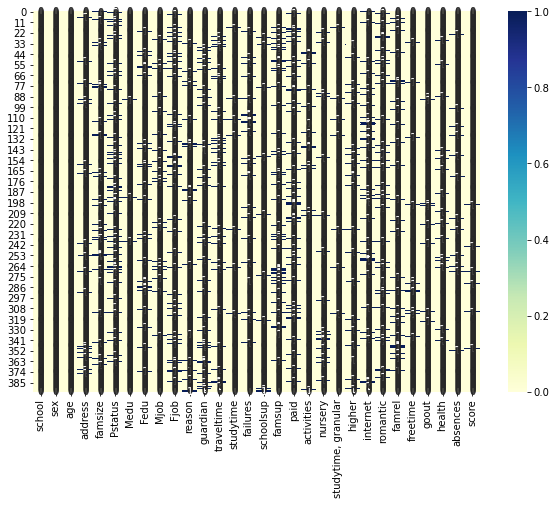

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(stud.isnull(),cmap="YlGnBu",annot=True)

Пропуски распределены равномерно по всему dataset